In [87]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

In [166]:
data = pd.read_csv('data/mir4_draco_tx.csv')

In [167]:
data

,txhash,status,txtype,gasused,amount,basetype,txsize,from,to,feepayer,nonce,blocknumber,txindex,gasprice,time,id,type
0,0x7ef557e58d1c32d17306d2e9432c63cb13b4822a9ea5...,1,49,128261,0,48,650,0x21ee083f0092b8becbba1843ffa1beb284ea6dfd,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,7503,48130006,0,25000000000,1656423243,0x7ef557e58d1c32d17306d2e9432c63cb13b4822a9ea5...,transaction
1,0x4f4d6a3c531c704d12d415fd2413c161bddc3e998be3...,1,49,128221,0,48,650,0xaac9c9a7578dd286dd749c523558d47b50e368ef,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,15149,48130003,3,25000000000,1656423240,0x4f4d6a3c531c704d12d415fd2413c161bddc3e998be3...,transaction
2,0xf764e147ca2c436b1807142499bf4b303d49173a3138...,1,49,113241,0,48,650,0x642c95862ae277feeb3c34fe93d6424e2df6ee7e,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,9754,48130002,1,25000000000,1656423239,0xf764e147ca2c436b1807142499bf4b303d49173a3138...,transaction
3,0x973761abe32aaaa3f8439f5a80c1994c1fdb10eb5fee...,1,49,113241,0,48,650,0x0bbf78fbc86d291a8e789127b47fb83e925bb44c,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,9756,48129999,2,25000000000,1656423236,0x973761abe32aaaa3f8439f5a80c1994c1fdb10eb5fee...,transaction
4,0x747ea8896202693146396a4cf2044d792638a429153a...,1,49,60286,0,48,295,0xc383ccb3dd58951702112ddfa96fe6830e4fb22c,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,0,48129993,5,25000000000,1656423230,0x747ea8896202693146396a4cf2044d792638a429153a...,transaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0x373e0dfb71e0dacb3bf407778f183917a697c7a11bf0...,1,49,113261,0,48,650,0x1de95620308df153a430bd875cc9c83e15f69686,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,9590,47916505,2,25000000000,1656209742,0x373e0dfb71e0dacb3bf407778f183917a697c7a11bf0...,transaction
199996,0x14dfdc47ec2d2c04adf488a6a40624d81d914ca039d6...,1,49,113241,0,48,650,0xb16a32448f15778b22e67d36961c145a9dc84807,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,9593,47916504,0,25000000000,1656209741,0x14dfdc47ec2d2c04adf488a6a40624d81d914ca039d6...,transaction
199997,0x0c0e73d48652691c942a440aa203aeec3d84757bbb84...,1,49,128241,0,48,650,0x05f02b1c7e280b6653a786a105c23e7f2e578df5,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,7549,47916502,0,25000000000,1656209739,0x0c0e73d48652691c942a440aa203aeec3d84757bbb84...,transaction
199998,0xeac884bdea2b31211217f452bc68ed574186e0f2b9b3...,1,49,143241,0,48,650,0x92d0b737e9708c94364f6912b72769c9f7b12c27,0x3e61e305390bb45983879f318ee6d0d5d2805e65,0x1e7d272d4d6f7c4f6fb5e7547f61856c9e9f0891,9695,47916500,0,25000000000,1656209737,0xeac884bdea2b31211217f452bc68ed574186e0f2b9b3...,transaction


In [168]:
columns = data.columns.tolist()

In [169]:
g1 = nx.Graph()

In [170]:
node_list = data['from'].tolist() + data['to'].tolist()
node_list = set(node_list)
node_list = list(node_list)

In [171]:
g1.add_nodes_from(node_list)

In [172]:
edge_list = []

In [173]:
edge_df = data[['from', 'to']]

In [174]:
edge_df

,from,to
0,0x21ee083f0092b8becbba1843ffa1beb284ea6dfd,0x3e61e305390bb45983879f318ee6d0d5d2805e65
1,0xaac9c9a7578dd286dd749c523558d47b50e368ef,0x3e61e305390bb45983879f318ee6d0d5d2805e65
2,0x642c95862ae277feeb3c34fe93d6424e2df6ee7e,0x3e61e305390bb45983879f318ee6d0d5d2805e65
3,0x0bbf78fbc86d291a8e789127b47fb83e925bb44c,0x3e61e305390bb45983879f318ee6d0d5d2805e65
4,0xc383ccb3dd58951702112ddfa96fe6830e4fb22c,0x3e61e305390bb45983879f318ee6d0d5d2805e65
...,...,...
199995,0x1de95620308df153a430bd875cc9c83e15f69686,0x3e61e305390bb45983879f318ee6d0d5d2805e65
199996,0xb16a32448f15778b22e67d36961c145a9dc84807,0x3e61e305390bb45983879f318ee6d0d5d2805e65
199997,0x05f02b1c7e280b6653a786a105c23e7f2e578df5,0x3e61e305390bb45983879f318ee6d0d5d2805e65
199998,0x92d0b737e9708c94364f6912b72769c9f7b12c27,0x3e61e305390bb45983879f318ee6d0d5d2805e65


In [175]:
edge_df.apply(lambda x: edge_list.append((x['from'], x['to'])), axis = 1)

0         None
1         None
2         None
3         None
4         None
          ... 
199995    None
199996    None
199997    None
199998    None
199999    None
Length: 200000, dtype: object

In [176]:
len(edge_list)

200000

In [177]:
g1.add_edges_from(edge_list)

In [178]:
remove1 = [node for node, degree in dict(g1.degree()).items() if degree > 1]
g1.remove_edges_from(remove1)

In [179]:
remove1

['0x3e61e305390bb45983879f318ee6d0d5d2805e65']

In [181]:
len(g1.edges)

41652

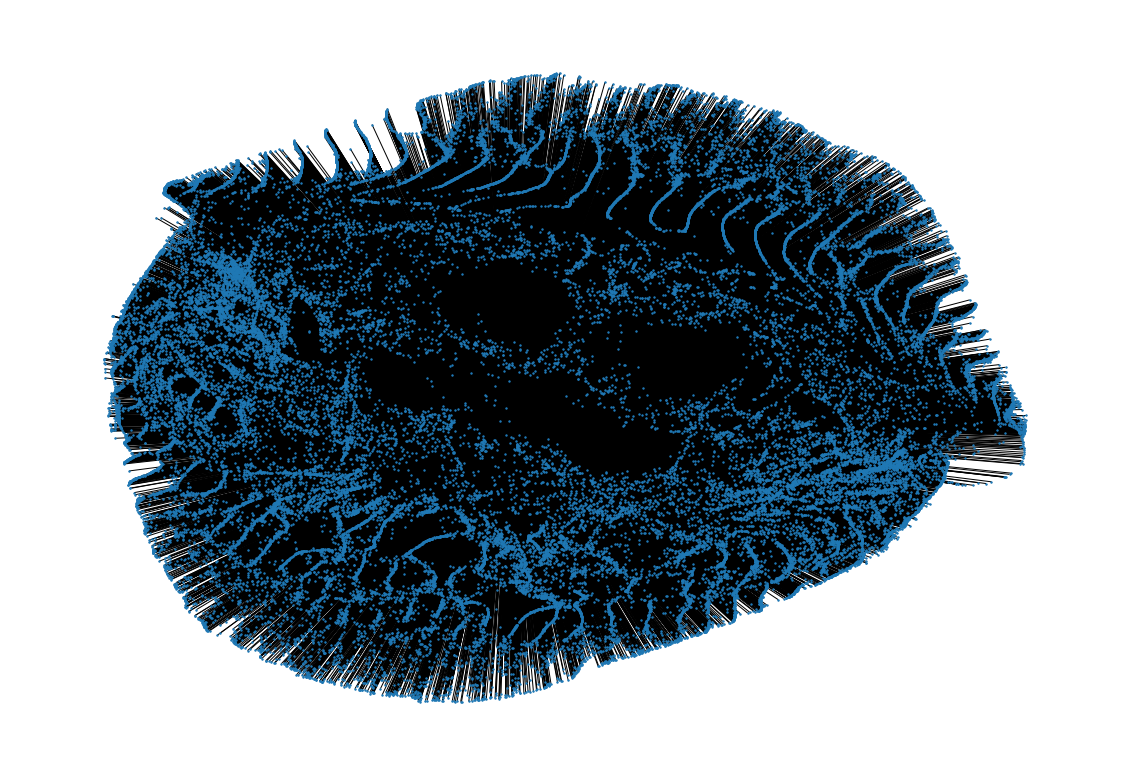

In [146]:
fig, ax = plt.subplots(figsize = (20, 14))

d = dict(g1.degree)
# nx.draw(g1, nodelist = d.keys(), node_size = [v * 1 for v in d.values()])
nx.draw(g1, node_size = 2)

In [157]:
degree_list = []
max_value = 0
for node in node_list:
    var = g1.degree[node]
    degree_list.append(var)
    if var >= max_value:
        max_value = var

In [160]:
sorted(degree_list, reverse = True)

[41652,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [159]:
len(degree_list)

41653